# The Brand Assesment

#### This notebook contains the exploratory data analysis for the Brand Case Study.The EDA explores data structure to reveal structure of the data and capture data points relevant to the given KPIs

In [23]:
#Import important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load datasets
data = pd.read_csv("the_brand.csv")
data.head()

,date_id,mttnsubad,raw_account_id,raw_account_name,raw_publisher_id,raw_publisher_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,...,page_views_experience,event_install_fitnessplus_entitlements,cid_creative,event_install_tvplus_amplify_subscription,event_fitness_plus_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,NaN,NaN,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,...,0,0,NaN,0,NaN,0,0,0,0,0


## Exploratory Data Analysis

In [3]:
#Whats in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Columns: 105 entries, date_id to phone_bf_engager
dtypes: float64(28), int64(36), object(41)
memory usage: 74.0+ KB


In [4]:
# Descriptive statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mttnsubad,90.0,2.837301e+06,764858.094525,0.0,2998299.75,3019066.0,3045897.00,3237783.0
raw_publisher_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raw_publisher_name,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clicks,88.0,8.419318e+01,168.631943,0.0,6.75,19.5,54.25,688.0
video_starts,86.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...
event_install_mls_subscription,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
mac_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
watch_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
ipad_bf_engager,90.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


**Comments**  
-There are a lot of columns where the entire distribution is 0  
-Presence of non-normal distributions  

-Many columns have missing values


In [5]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [6]:
# Check for missing values in depth
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_df.index.name ="Column"
print("\nMissing Values Summary:")
missing_df


Missing Values Summary:


,Missing Values,Percentage
Column,,
date_id,0,0.0
mttnsubad,0,0.0
raw_account_id,0,0.0
raw_account_name,0,0.0
raw_publisher_id,90,100.0
...,...,...
event_install_mls_subscription,0,0.0
mac_bf_engager,0,0.0
watch_bf_engager,0,0.0


In [7]:
#What percentage of the columns have missing values
columns_with_missing_values =  missing_df[missing_df["Percentage"] > 0].reset_index()
number_of_columns_with_missing_values = columns_with_missing_values.shape[0]
percentage_missing = number_of_columns_with_missing_values / len(data.columns) * 100
print("\nNumber of Columns with Missing Values:" , number_of_columns_with_missing_values)
print("Percentage of Columns with Missing Values:" , round(percentage_missing,2),"%")


Number of Columns with Missing Values: 33
Percentage of Columns with Missing Values: 31.43 %


In [8]:
#Get all columns which dont have values ie 100% null
null_columns =  missing_df[missing_df["Percentage"] == 100].reset_index()
null_columns

,Column,Missing Values,Percentage
0,raw_publisher_id,90,100.0
1,raw_publisher_name,90,100.0
2,placement_tracking_type,90,100.0
3,creative_offer,90,100.0
4,page_views,90,100.0
5,airtags_add_to_cart_visits,90,100.0
6,app_downloads_vuze,90,100.0
7,cid_creative,90,100.0
8,event_fitness_plus_subscription,90,100.0


#### Comment
- Columns about bounces ,views and engager all have 0 as a value or null
- Most granular metrics like event_install,potential_watch_buyer_visit etc have zeros for all campaigns.This might be an indication that the data collection for those specific data points in the user journey was not done properly(or data not available)
- 34 % of the columns have null values, some columns particulary user activity metrics do not have null values but zeros instead

In [9]:
#Remove columns with  no values ie percentage of missing values is 100
#More null values or zero columns to be investigated later
columns_to_remove = null_columns["Column"].tolist()
# Remove those columns from the dataFrame
data = data.drop(columns=columns_to_remove)
data.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,total_seconds_spent_experience,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


### Explore the volume, cost and efficiency columns to identify distribution and fix any outlier issues

In [10]:
#Add the CTR effeciency column
data["CTR"] = data["clicks"]/data["impressions"] * 100
data.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,page_views_dotcom,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.206769
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.222886
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.204210
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.203068
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0.207601


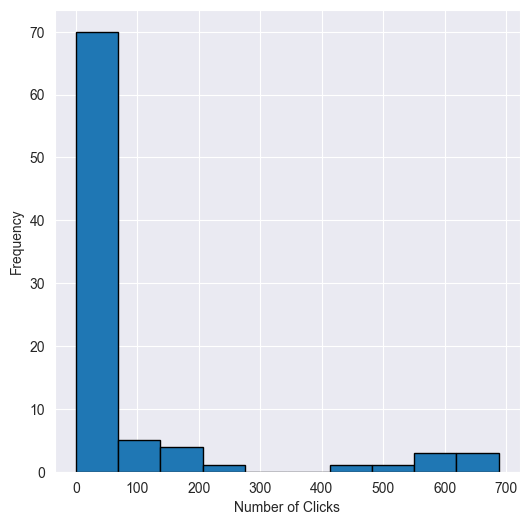

In [11]:
# Clicks distribution
# Check  the distribution of clicks
plt.figure(figsize = (6,6))
plt.hist(data["clicks"], bins=10, edgecolor='k')
plt.ylabel("Frequency")
plt.xlabel("Number of Clicks");

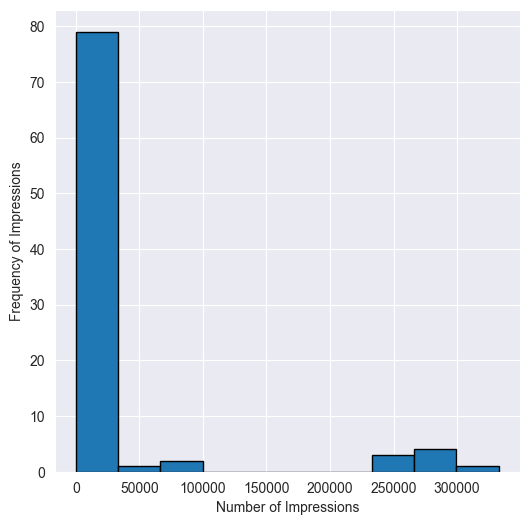

In [12]:
# Impresssions distribution
plt.figure(figsize = (6,6))
plt.hist(data["impressions"], bins=10, edgecolor='k')
plt.ylabel("Frequency of Impressions")
plt.xlabel("Number of Impressions");

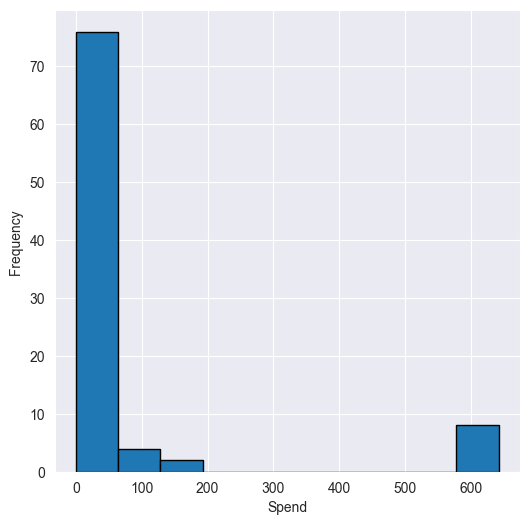

In [13]:
# Check  the distribution of spend
plt.figure(figsize = (6,6))
plt.hist(data["spend_net_usd"], bins=10, edgecolor='k')
plt.ylabel("Frequency ")
plt.xlabel("Spend");

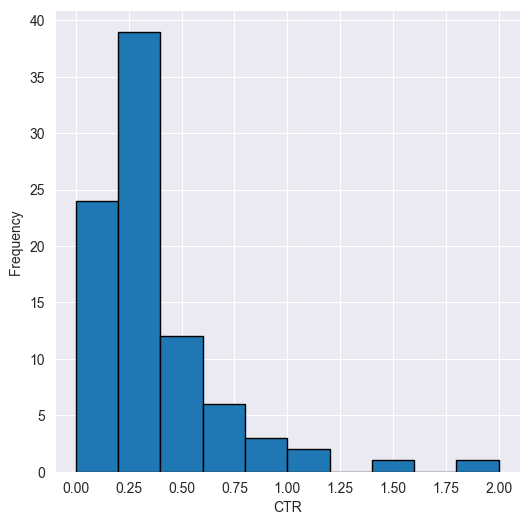

In [14]:
# Check  the distribution of CTR
plt.figure(figsize = (6,6))
plt.hist(data["CTR"], bins=10, edgecolor='k')
plt.ylabel("Frequency ")
plt.xlabel("CTR");

#### Comment
- Distributions are centered around the edges
- No/low middle values
- Most of the values are concentrated on the lower end of the x-axis (close to 0).
- A few campaigns have significantly higher clicks (e.g., 500–700 range). These campaigns could be anomalies or high-performing campaigns compared to the others
- Based on the pattern of spend,its possible that the edge case spending might also be influencing the distribution of the clicks/ impressions graphs.
- CTR is right skewed, values are also very low with max being 2%

In [15]:
#Check again distribution of these main columns
key_columns = data[["clicks","impressions","spend_net_usd","CTR"]]
key_columns.describe()

Column,clicks,impressions,spend_net_usd,CTR
count,88.000000,90.000000,90.000000,88.000000
mean,84.193182,32844.777778,75.714174,0.363901
std,168.631943,78265.530860,171.035919,0.317229
min,0.000000,3.000000,0.000000,0.000000
25%,6.750000,1938.000000,8.104150,0.188433
50%,19.500000,5307.500000,16.402100,0.269965
75%,54.250000,12638.500000,32.167200,0.474955
max,688.000000,332738.000000,642.370000,2.000000


### Comment  
-There is significant variability in clicks,as indicated by the large standard deviation compared to the mean.  
-The majority of impressions are concentrated below 12,638.5 (75th percentile), but the maximum value of 332,738 shows some extreme outliers.  
-The average spend is 75.71, but the median is 16.40, showing that most campaigns have lower spend, and a few campaigns with very high spend (max 642.37) inflate the average
-The average number of clicks is 84.19, but the maximum (688) is much higher than the 75th percentile (54.25). This indicates potential outliers  
-A median of 19.5 suggests that half of the campaigns receive relatively low clicks compared to the average, indicating a skewed distribution

In [ ]:
#Because of how skewed the distributiions are, check the relationships between the three KPIs to explore possibility of segmentaing the data instead of removing "outliers", this might provide more meaningful insights

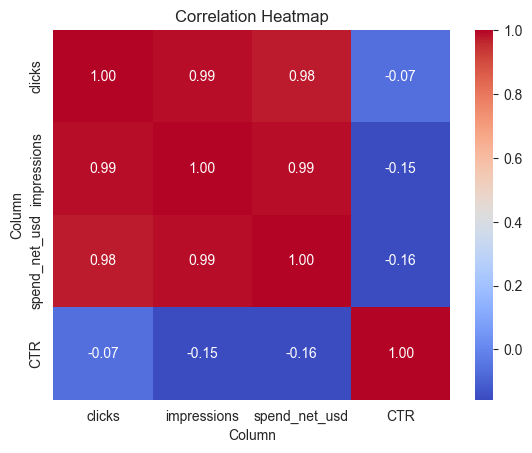

In [16]:
#Check for correlation
# Correlation matrix
correlation_matrix = key_columns.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show();


### Comment
- All variables except CTR have a very strong positive correlation
- CTR has weak negative correlation with all variables

In [ ]:
# Since outliers might give an performance indication of different strategies, we can segment the data into three segments based on spend.Spend is the variable we can directly control from these KPIs, so it will be effective to see the variation of the other metrics based on spend categories[Low,Medium and High]

In [17]:
#Solve the null issue in the clicks column
data['clicks'] = data['clicks'].fillna(0)
# Calculate percentiles
low_percentile = data["spend_net_usd"].quantile(0.33)
high_percentile = data["spend_net_usd"].quantile(0.67)

#Create categories based on the percentiles
conditions = [
    (data["spend_net_usd"] <= low_percentile),    # Low spend: <= 33rd percentile
    (data["spend_net_usd"] > low_percentile) & (data["spend_net_usd"] <= high_percentile),  # Medium spend: between 33rd and 67th percentile
    (data["spend_net_usd"] > high_percentile)     # High spend: > 67th percentile
]

# Corresponding labels for the conditions
labels = ['Low Spend', 'Medium Spend', 'High Spend']

# Create a new column for the spend category
data['spend_category'] = pd.cut(data["spend_net_usd"], bins=[-float('inf'), low_percentile, high_percentile, float('inf')], labels=labels)
data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,page_views_experience,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.206769,High Spend
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.222886,High Spend
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.204210,High Spend
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.203068,High Spend
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0,0.207601,High Spend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,13/01/2023,0,727787507,THE BRAND IN (INR),163391,Q223/Q323 Upgraders Programmatic Display,3237781,03067959_wwa_in_dis_phModeln_phnupabc_pdis_dv3...,1031432,INEN_UPG_DCO_320x480_BAN_ALL_NA_AIP_NA_NA_NA_NA,...,0,0,0,0,0,0,0,0,0.129983,High Spend
86,13/01/2023,0,4471534,TheBrand_EUR,1074569554,02967646_Marcom_Digital_phone_2023 phone model...,1078838883,03065507_wwa_es_dis_phModeln_phnupabc_pdis_dv3...,na,ESES_14PV11_STATIC_320x480_BAN_YXIVPL_BBDSPL_N...,...,0,0,0,0,0,0,0,0,1.447393,Medium Spend
87,13/01/2023,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840353,02977633_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,0,0,0,0,NaN,Low Spend
88,13/01/2023,0,4029436,THE BRAND KR (KRW),1074570016,02967646_Marcom_Digital_phone_2023 phone model...,1078841457,03000201_wwa_kr_dis_phModeln_phnupabc_pdis_dv3...,na,Prima-Donna-KR-Upgraders-300x250,...,0,0,0,0,0,0,0,0,0.172951,Low Spend


### Calculated KPI Columns

In [18]:
#Since we will be comparing values either as in the US or Worldwide, create a new column to classify as US or Worldwide
data["Country"] = data["market"].apply(lambda x: "US" if x == "United States" else "Worldwide")
data

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.206769,High Spend,US
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.222886,High Spend,US
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.204210,High Spend,US
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.203068,High Spend,US
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0,0,0.207601,High Spend,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,13/01/2023,0,727787507,THE BRAND IN (INR),163391,Q223/Q323 Upgraders Programmatic Display,3237781,03067959_wwa_in_dis_phModeln_phnupabc_pdis_dv3...,1031432,INEN_UPG_DCO_320x480_BAN_ALL_NA_AIP_NA_NA_NA_NA,...,0,0,0,0,0,0,0,0.129983,High Spend,Worldwide
86,13/01/2023,0,4471534,TheBrand_EUR,1074569554,02967646_Marcom_Digital_phone_2023 phone model...,1078838883,03065507_wwa_es_dis_phModeln_phnupabc_pdis_dv3...,na,ESES_14PV11_STATIC_320x480_BAN_YXIVPL_BBDSPL_N...,...,0,0,0,0,0,0,0,1.447393,Medium Spend,Worldwide
87,13/01/2023,0,5183348,THE BRAND Canada,1074569600,02967646_Marcom_Digital_phone_2023 phone model...,1078840353,02977633_WWA_CA_DIS_phModelN_phnupabc_PDIS_DV3...,na,Prima-Donna-CAFR-Upgraders-414x736,...,0,0,0,0,0,0,0,NaN,Low Spend,Worldwide
88,13/01/2023,0,4029436,THE BRAND KR (KRW),1074570016,02967646_Marcom_Digital_phone_2023 phone model...,1078841457,03000201_wwa_kr_dis_phModeln_phnupabc_pdis_dv3...,na,Prima-Donna-KR-Upgraders-300x250,...,0,0,0,0,0,0,0,0.172951,Low Spend,Worldwide


In [ ]:
#We have 2 platforms each with varying KPIs.
#Divide the data among the two platforms

In [19]:
data["platform"].value_counts()

platform
Social                  78
Programmatic Display    12
Name: count, dtype: int64

In [20]:
# Programmatic display is website data and social data
web_campaigns = data[data["platform"] == "Programmatic Display"]
app_campaigns = data[data["platform"] == "Social"]
web_campaigns.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_fitnessplus_entitlements,event_install_tvplus_amplify_subscription,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country
25,13/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.000000,Medium Spend,Worldwide
34,14/01/2023,3237782,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237782,3067880_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465897869,110123_03067880_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.191939,Medium Spend,Worldwide
57,18/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.288948,High Spend,Worldwide
66,19/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.157729,Medium Spend,Worldwide
70,19/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0,0,0.260973,High Spend,Worldwide


In [ ]:
# KPI calculation for web data
#Visits to com column has zeros throughout(data collection error/ data unavailable)  
# Engagements column has values so can be used to calculate engaged visits volume
#Performance values for volume is all zeros
#The columns for completion rates are zeros ( CR 75% = (views_75 / video_starts) * 100)
#CTR is already calculated
# BR% = (bounces / visits) * 100 , bounces and visits columns are zeros
# QVR% = (potential_phone_buyer_visit / visits) * 100, columns have zeros
# Other Effeciency KPIs  also have zeros



In [24]:
#Cost per view
web_campaigns["CPCV"] = web_campaigns["spend_net_usd"] / web_campaigns["impressions"]
#Cost per Click ($CPC)
web_campaigns["CPC"]  = web_campaigns["spend_net_usd"] / web_campaigns["clicks"]
#Cost per visit
#Data for CPV is not possible because visits column is all zeros
#This is also the same with the other Cost KPIs
# Replace inf and -inf with 0
web_campaigns.replace([np.inf, -np.inf], 0, inplace=True)
web_campaigns.head()


Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country,CPCV,CPC
25,13/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.000000,Medium Spend,Worldwide,0.025627,0.000000
34,14/01/2023,3237782,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237782,3067880_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465897869,110123_03067880_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.191939,Medium Spend,Worldwide,0.021458,11.179800
57,18/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.288948,High Spend,Worldwide,0.023852,8.254775
66,19/01/2023,3237764,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237764,3067264_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465898859,110123_03067264_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.157729,Medium Spend,Worldwide,0.024955,15.821600
70,19/01/2023,3237783,na,DV360,id_52985256,Q223 IN phone: Upgraders Programmatic Display ...,id_3237783,3049961_wwa_in_dis_phModeln_phnupabc_pdis_dv36...,id_465900360,110123_03049961_wwa_in_dis_phModeln_phnupabc_p...,...,0,0,0,0,0,0.260973,High Spend,Worldwide,0.023622,9.051518


In [26]:
#App specific Metrics
#There is no consideration and performance values for volume
#All other effeciency metrics not possible because of zero values .CTR is already calculated
#Cost per view
app_campaigns["CPCV"] = app_campaigns["spend_net_usd"] / app_campaigns["impressions"]
#Cost per Click ($CPC)
app_campaigns["CPC"]  = app_campaigns["spend_net_usd"] / app_campaigns["clicks"]
app_campaigns.replace([np.inf, -np.inf], 0, inplace=True)
app_campaigns.head()

Column,date_id,mttnsubad,raw_account_id,raw_account_name,raw_campaign_id,raw_campaign_name,raw_placement_id,raw_placement_name,raw_creative_id,raw_creative_name,...,event_install_mls_subscription,mac_bf_engager,watch_bf_engager,ipad_bf_engager,phone_bf_engager,CTR,spend_category,Country,CPCV,CPC
0,03/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.206769,High Spend,US,0.001864,0.901628
1,04/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.222886,High Spend,US,0.002112,0.947581
2,05/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.204210,High Spend,US,0.002100,1.028439
3,06/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.203068,High Spend,US,0.002495,1.228898
4,07/01/2023,2997779,380749300,The Brand -US PST,32103862,02967646_marcom_digital_phone_2023 phone model...,40525630,02997779_wwa_us_soc_phModeln_phnupabc_socl_twi...,NaN,NaN,...,0,0,0,0,0,0.207601,High Spend,US,0.002399,1.155598


In [48]:
#Calculated metrics for the whole dataset
#Cost per view
data["CPCV"] = data["spend_net_usd"] / data["impressions"]
#Cost per Click ($CPC)
data["CPC"]  = data["spend_net_usd"] / data["clicks"]
data.replace([np.inf, -np.inf], 0, inplace=True)

## Furthur Analysis

In [27]:
#Campaign Run time
#Correct Date Format
data["date_id"] = pd.to_datetime(data["date_id"],dayfirst=True)

campaign_start_date = data["date_id"].min()
campaign_end_date = data["date_id"].max()
print(f"Campaign Duration : {campaign_start_date} - {campaign_end_date}")

Campaign Duration : 2023-01-03 00:00:00 - 2023-01-21 00:00:00


In [28]:
#Campaign Markets
data["market"].value_counts()

market
India                   13
United Arab Emirates     9
United States            8
Japan                    8
United Kingdom           8
Turkey                   7
Spain                    5
Switzerland              5
Canada                   5
France                   4
Saudi Arabia             4
Germany                  3
Australia                3
Italy                    2
South Korea              2
Taiwan                   1
Malaysia                 1
Singapore                1
Thailand                 1
Name: count, dtype: int64

In [29]:
# Campaign Channels
data["publisher"].unique().tolist()

['Twitter', 'Snapchat', 'DV360 DSP']

In [30]:
# Creatives  formats used
data["creative_format"].unique().tolist()

['Static']

In [31]:
# Creative Products
data["creative_product"].value_counts()

creative_product
phone modelabc Plus    77
phone modelabc         13
Name: count, dtype: int64

In [32]:
# Creative Features
data["creative_feature"].value_counts()

creative_feature
Display / Upgrade your display to bigger and better    90
Name: count, dtype: int64

In [33]:
# Creative CTA
data["creative_cta"].value_counts()

creative_cta
Upgrade Now    64
Name: count, dtype: int64

In [34]:
# Creative dimensions used
data["creative_dimensions"].unique().tolist()

['1:1 AR', '9:16 AR', '320x480', '414x736', '300x250']

### KPI and Trends by Region

In [ ]:
# Volume, Efficiency & Cost

In [35]:
#Regional views(Volume)
regional_views_volume = data.groupby(["Country"])["impressions"].sum().reset_index()
regional_views_volume

,Country,impressions
0,US,2217680
1,Worldwide,738350


In [39]:
# Accounting for outliers ,adding a third dimension(spend)
regional_views_volume = data.groupby(["Country","spend_category"])["impressions"].mean().reset_index()
regional_views_volume

,Country,spend_category,impressions
0,US,Low Spend,NaN
1,US,Medium Spend,NaN
2,US,High Spend,277210.000000
3,Worldwide,Low Spend,3026.800000
4,Worldwide,Medium Spend,6393.333333
5,Worldwide,High Spend,20715.727273


In [40]:
# Accounting for outliers ,adding a third dimension(spend)
regional_clicks_volume = data.groupby(["Country","spend_category"])["clicks"].mean().reset_index()
regional_clicks_volume

,Country,spend_category,clicks
0,US,Low Spend,NaN
1,US,Medium Spend,NaN
2,US,High Spend,592.750000
3,Worldwide,Low Spend,10.633333
4,Worldwide,Medium Spend,32.200000
5,Worldwide,High Spend,62.818182


In [125]:
print(regional_clicks_volume)

     Country spend_category      clicks
0         US      Low Spend         NaN
1         US   Medium Spend         NaN
2         US     High Spend  592.750000
3  Worldwide      Low Spend   10.633333
4  Worldwide   Medium Spend   32.200000
5  Worldwide     High Spend   62.818182


In [43]:
#Average CTR for app and web in the US Vs Worldwide
# Accounting for outliers ,adding a third dimension(spend)
regional_CTR_volume_app = app_campaigns.groupby(["Country","spend_category"])["CTR"].mean().reset_index()
regional_CTR_volume_web = web_campaigns.groupby(["Country","spend_category"])["CTR"].mean().reset_index()
regional_CTR_volume_web["platform"] = "web"
regional_CTR_volume_app["platform"] = "app"
regional_CTR =pd.concat([regional_CTR_volume_app, regional_CTR_volume_web])
regional_CTR


,Country,spend_category,CTR,platform
0,US,Low Spend,NaN,app
1,US,Medium Spend,NaN,app
2,US,High Spend,0.213715,app
3,Worldwide,Low Spend,0.320885,app
4,Worldwide,Medium Spend,0.477164,app
5,Worldwide,High Spend,0.357842,app
0,Worldwide,Low Spend,0.172951,web
1,Worldwide,Medium Spend,0.485311,web
2,Worldwide,High Spend,0.169976,web


In [44]:
#Regional Cost( Cost Per Click)
regional_clicks_cost_app = app_campaigns.groupby(["Country","spend_category"])["CPC"].mean().reset_index()
regional_clicks_cost_web = app_campaigns.groupby(["Country","spend_category"])["CPC"].mean().reset_index()
regional_clicks_cost_web["platform"] = "web"
regional_clicks_cost_app["platform"] = "app"
regional_clicks_cost =pd.concat([regional_clicks_cost_app,regional_clicks_cost_web])
regional_clicks_cost


,Country,spend_category,CPC,platform
0,US,Low Spend,NaN,app
1,US,Medium Spend,NaN,app
2,US,High Spend,1.043654,app
3,Worldwide,Low Spend,0.707507,app
4,Worldwide,Medium Spend,1.435980,app
5,Worldwide,High Spend,1.066812,app
0,US,Low Spend,NaN,web
1,US,Medium Spend,NaN,web
2,US,High Spend,1.043654,web
3,Worldwide,Low Spend,0.707507,web


In [45]:
#Regional Cost( Cost Per View)
regional_view_cost_app = app_campaigns.groupby(["Country","spend_category"])["CPCV"].mean().reset_index()
regional_view_cost_web = app_campaigns.groupby(["Country","spend_category"])["CPCV"].mean().reset_index()
regional_view_cost_web["platform"] = "web"
regional_view_cost_app["platform"] = "app"
regional_view_cost =pd.concat([regional_view_cost_app,regional_view_cost_web])
regional_view_cost


,Country,spend_category,CPCV,platform
0,US,Low Spend,NaN,app
1,US,Medium Spend,NaN,app
2,US,High Spend,0.002227,app
3,Worldwide,Low Spend,0.003504,app
4,Worldwide,Medium Spend,0.003941,app
5,Worldwide,High Spend,0.003171,app
0,US,Low Spend,NaN,web
1,US,Medium Spend,NaN,web
2,US,High Spend,0.002227,web
3,Worldwide,Low Spend,0.003504,web


In [ ]:
# How do engagements change over the course of the campaign

In [57]:
#Select relevant columns
df = data[["date_id","clicks","impressions","engagements","spend_net_usd","Country","spend_category","CTR","CPCV","CPC"]]

In [62]:
# Group by 'date_id' and calculate averages and totals
result = df.groupby(["date_id","Country"]).agg(
    avg_ctr=("CTR", "mean"),
    avg_cpcv=("CPCV", "mean"),
    avg_cpc=("CPC", "mean"),
    avg_clicks=("clicks", "mean"),
    avg_engagements=("engagements", "mean"),
    avg_impressions=("impressions", "mean"),
    total_spend_net_usd=("spend_net_usd", "sum")
).reset_index()

result

,date_id,Country,avg_ctr,avg_cpcv,avg_cpc,avg_clicks,avg_engagements,avg_impressions,total_spend_net_usd
0,2023-01-03,US,0.206769,0.001864,0.901628,688.000000,2639.000000,332738.000000,620.3200
1,2023-01-04,US,0.222886,0.002112,0.947581,649.000000,2163.000000,291180.000000,614.9800
2,2023-01-05,US,0.204210,0.002100,1.028439,570.000000,2145.000000,279124.000000,586.2100
3,2023-01-06,US,0.203068,0.002495,1.228898,481.000000,1801.000000,236867.000000,591.1000
4,2023-01-07,US,0.207601,0.002399,1.155598,518.000000,2013.000000,249517.000000,598.6000
5,2023-01-08,US,0.227307,0.002404,1.057806,597.000000,2255.000000,262640.000000,631.5100
6,2023-01-09,US,0.213392,0.002215,1.037970,591.000000,1999.000000,276955.000000,613.4400
7,2023-01-10,Worldwide,0.430729,0.002674,0.776419,24.857143,41.857143,6307.857143,87.2744
8,2023-01-11,Worldwide,0.448900,0.002993,0.768437,37.800000,23.400000,9345.600000,112.8529
9,2023-01-12,Worldwide,0.328017,0.003825,0.603983,13.333333,17.333333,3543.166667,70.2444


In [63]:
#Seperate data by region
us_data = result[result['Country'] == "US"]
worldwide_data = result[result['Country'] == "Worldwide"]

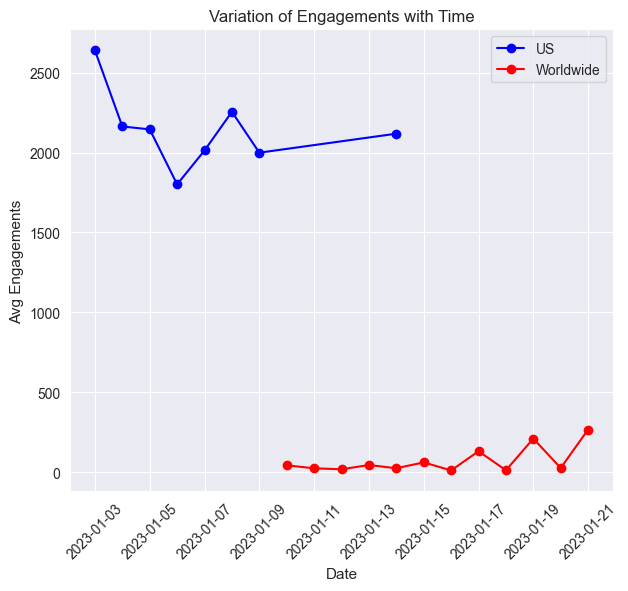

In [64]:
# Plotting Engagement variation over the course of the campaign
plt.figure(figsize=(7, 6))

# US line plot
plt.plot(
    us_data['date_id'],
    us_data['avg_engagements'],
    marker='o',
    linestyle='-',
    color='b',
    label='US'
)

# Worldwide line plot
plt.plot(
    worldwide_data['date_id'],
    worldwide_data['avg_engagements'],
    marker='o',
    linestyle='-',
    color='r',
    label='Worldwide'
)

# Customizing the plot
plt.title('Variation of Engagements with Time', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Avg Engagements', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


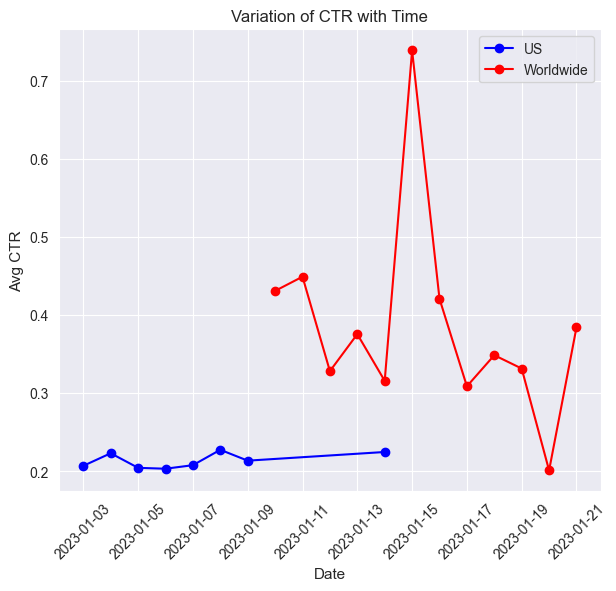

In [65]:

# Plotting CTR variation over the course of the campaign
plt.figure(figsize=(7, 6))

# US line plot
plt.plot(
    us_data['date_id'],
    us_data['avg_ctr'],
    marker='o',
    linestyle='-',
    color='b',
    label='US'
)

# Worldwide line plot
plt.plot(
    worldwide_data['date_id'],
    worldwide_data['avg_ctr'],
    marker='o',
    linestyle='-',
    color='r',
    label='Worldwide'
)

# Customizing the plot
plt.title('Variation of CTR with Time', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Avg CTR', fontsize=11)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


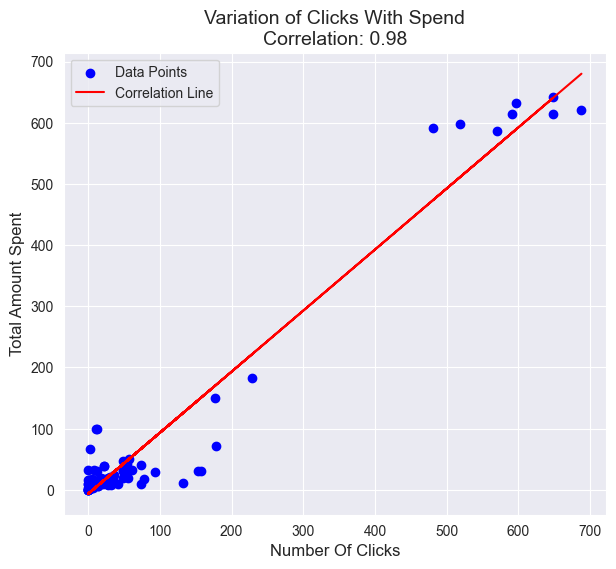

In [66]:
#Overall variation of spend with clicks

# Remove rows with NaN or infinite values
data_cleaned = data.dropna(subset=['clicks', 'spend_net_usd'])  # Remove rows with NaN
data_cleaned = data_cleaned[np.isfinite(data_cleaned['clicks']) & np.isfinite(data_cleaned['spend_net_usd'])]  # Remove rows with infinite values

# Scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(
    x=data_cleaned['clicks'],
    y=data_cleaned['spend_net_usd'],
    color='blue',
    label='Data Points'
)

# Calculate and plot correlation line
m, b = np.polyfit(data_cleaned['clicks'], data_cleaned['spend_net_usd'], 1)  # Linear regression
plt.plot(data_cleaned['clicks'], m * data_cleaned['clicks'] + b, color='red', label='Correlation Line')

# Calculate correlation coefficient
correlation = np.corrcoef(data_cleaned['clicks'], data_cleaned['spend_net_usd'])[0, 1]

# Customizing the plot
plt.title(f'Variation of Clicks With Spend\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('Number Of Clicks', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


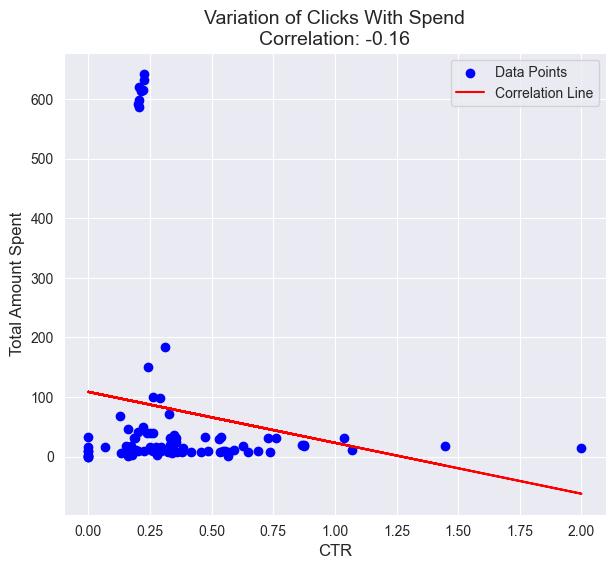

In [67]:
#Overall variation of spend with clicks

# Remove rows with NaN or infinite values
data_cleaned = data.dropna(subset=['CTR', 'spend_net_usd'])  # Remove rows with NaN
data_cleaned = data_cleaned[np.isfinite(data_cleaned['CTR']) & np.isfinite(data_cleaned['spend_net_usd'])]  # Remove rows with infinite values

# Scatter plot
plt.figure(figsize=(7, 6))
plt.scatter(
    x=data_cleaned['CTR'],
    y=data_cleaned['spend_net_usd'],
    color='blue',
    label='Data Points'
)

# Calculate and plot correlation line
m, b = np.polyfit(data_cleaned['CTR'], data_cleaned['spend_net_usd'], 1)  # Linear regression
plt.plot(data_cleaned['CTR'], m * data_cleaned['CTR'] + b, color='red', label='Correlation Line')

# Calculate correlation coefficient
correlation = np.corrcoef(data_cleaned['CTR'], data_cleaned['spend_net_usd'])[0, 1]

# Customizing the plot
plt.title(f'Variation of Clicks With Spend\nCorrelation: {correlation:.2f}', fontsize=14)
plt.xlabel('CTR', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# What are the attributes of the best and worst campaigns based on KPIs volume(views&clicks),effeciency(CTR) and cost(CPC)


In [77]:
strategy_columns = data[["raw_campaign_id","market","campaign","platform","publisher","creative","audience_device_targeted","placement_type","creative_cta","clicks","impressions","engagements","audience_targeting_segment","creative_dimensions","creative_carrier","creative_copy","spend_net_usd","CTR","CPC","CPCV","spend_category"]]
strategy_columns

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,...,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR,CPC,CPCV,spend_category
0,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,688.0,...,2639.0,Broad Audience,1:1 AR,NaN,phModeldef,620.3200,0.206769,0.901628,0.001864,High Spend
1,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,649.0,...,2163.0,Broad Audience,1:1 AR,NaN,phModeldef,614.9800,0.222886,0.947581,0.002112,High Spend
2,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,570.0,...,2145.0,Broad Audience,1:1 AR,NaN,phModeldef,586.2100,0.204210,1.028439,0.002100,High Spend
3,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,481.0,...,1801.0,Broad Audience,1:1 AR,NaN,phModeldef,591.1000,0.203068,1.228898,0.002495,High Spend
4,32103862,United States,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,518.0,...,2013.0,Broad Audience,1:1 AR,NaN,phModeldef,598.6000,0.207601,1.155598,0.002399,High Spend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,163391,India,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone modelxyz Display...,phone 12 Device Targeting,Standard Banner,Upgrade Now,3.0,...,0.0,Broad Audience,320x480,NaN,phModeldef,67.3285,0.129983,22.442833,0.029172,High Spend
86,1074569554,Spain,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,Standard Banner,Upgrade Now,78.0,...,0.0,Broad Audience,320x480,NaN,NaN,17.4135,1.447393,0.223250,0.003231,Medium Spend
87,1074569600,Canada,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone X Display Size,All iOS Device Targeting,Standard Banner,Upgrade Now,0.0,...,0.0,Consumer Electronics,414x736,Rogers,NaN,0.0095,NaN,0.000000,0.003167,Low Spend
88,1074570016,South Korea,2023 phone modelabc Upgraders,Programmatic Display,DV360 DSP,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,Standard Banner,Upgrade Now,5.0,...,0.0,Broad Audience,300x250,SKT,NaN,4.7096,0.172951,0.941920,0.001629,Low Spend


In [78]:
#To account for outliers, use the spend segmentation
low_spend = strategy_columns[strategy_columns["spend_category"] =="Low Spend"]
medium_spend = strategy_columns[strategy_columns["spend_category"]=="Medium Spend"]
high_spend = strategy_columns[strategy_columns["spend_category"]=="High Spend"]

In [ ]:
# Top Attributes For Low Spend Campaigns

In [87]:
# What are the attributes of the best and worst campaigns based on KPIs volume(views&clicks),effeciency(CTR) and cost(CPC)
sorted_data_low = low_spend.sort_values(by=['clicks', 'impressions','engagements','CTR','CPC','CPCV'], ascending=False)
top_low = sorted_data_low.head(10)

In [108]:
#Check combination of creatives 
# Define the columns related to 'creative' 
creative_columns = [
    'creative',
    'creative_cta',
    'creative_dimensions',
    'creative_carrier',
    'creative_copy',
]

# Extract unique combinations 
unique_creative_combinations = (
    top_low[creative_columns]
    .drop_duplicates()
)
# Display the result
unique_creative_combinations

Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy
82,phone modelabc Plus vs. phone X Display Size,Upgrade Now,1:1 AR,NaN,None
24,phone modelabc vs. phone 8 Display Size - IN only,Upgrade Now,1:1 AR,NaN,phModel8
17,phone modelabc Plus vs. phone X Display Size,Upgrade Now,1:1 AR,NaN,phModelx-na-pal
10,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,9:16 AR,NaN,None
40,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,None
19,phone modelabc Plus vs. phone X Display Size,None,1:1 AR,NaN,phModelx
8,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,Softbank,None
7,phone modelabc Plus vs. phone X Display Size,Upgrade Now,1:1 AR,Rakuten,None
39,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,1:1 AR,NaN,None


In [89]:
top_low

Column,raw_campaign_id,market,campaign,platform,publisher,creative,audience_device_targeted,placement_type,creative_cta,clicks,...,engagements,audience_targeting_segment,creative_dimensions,creative_carrier,creative_copy,spend_net_usd,CTR,CPC,CPCV,spend_category
82,32207470,Turkey,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone X Display Size,phone X Device Targeting,In-Feed,Upgrade Now,73.0,...,143.0,Broad Audience,1:1 AR,NaN,NaN,9.0143,0.688874,0.123484,0.000851,Low Spend
24,32269269,India,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc vs. phone 8 Display Size - IN only,phone 7 Device Targeting,In-Feed,Upgrade Now,32.0,...,54.0,Broad Audience,1:1 AR,NaN,phModel8,7.3648,0.645812,0.230150,0.001486,Low Spend
17,32150978,Taiwan,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone X Display Size,phone XS & X Device Targeting,In-Feed,Upgrade Now,29.0,...,87.0,Broad Audience,1:1 AR,NaN,phModelx-na-pal,9.0958,0.227790,0.313648,0.000714,Low Spend
10,a8678f0e-8ccc-4e6f-b8dc-fed0aa6a29e1,Turkey,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,User Stories,Upgrade Now,27.0,...,0.0,Photography,9:16 AR,NaN,NaN,8.0224,0.736297,0.297126,0.002188,Low Spend
40,32207467,United Arab Emirates,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,In-Feed,Upgrade Now,17.0,...,83.0,Broad Audience,1:1 AR,NaN,NaN,8.9925,0.263729,0.528971,0.001395,Low Spend
30,a8678f0e-8ccc-4e6f-b8dc-fed0aa6a29e1,Turkey,2023 phone modelabc Upgraders,Social,Snapchat,phone modelabc Plus vs. phone modelxyz Display...,phone modelxyz Device Targeting,User Stories,Upgrade Now,14.0,...,0.0,Photography,9:16 AR,NaN,NaN,8.0115,0.323251,0.572250,0.001850,Low Spend
19,32252204,France,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone X Display Size,phone X Device Targeting,In-Feed,NaN,14.0,...,47.0,Photography,1:1 AR,NaN,phModelx,5.7988,0.340136,0.414200,0.001409,Low Spend
8,32134442,Japan,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone modelxyz Display...,phone XR Device Targeting,In-Feed,Upgrade Now,13.0,...,77.0,Broad Audience,1:1 AR,Softbank,NaN,6.2590,0.131539,0.481462,0.000633,Low Spend
7,32134435,Japan,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone X Display Size,phone XS Device Targeting,In-Feed,Upgrade Now,12.0,...,55.0,Broad Audience,1:1 AR,Rakuten,NaN,7.4241,0.149235,0.618675,0.000923,Low Spend
39,32093754,Australia,2023 phone modelabc Upgraders,Social,Twitter,phone modelabc Plus vs. phone 8 Plus Display Size,phone 7 Plus & 8 Plus Device Targeting,In-Feed,Upgrade Now,11.0,...,30.0,Broad Audience,1:1 AR,NaN,NaN,8.5400,0.553042,0.776364,0.004294,Low Spend


In [110]:
def get_combinations(df):
    sorted_data = df.sort_values(by=['clicks', 'impressions','engagements','CTR','CPC','CPCV'], ascending=False)
    top = sorted_data.head(10)
    #Check combination of creatives 
# Define the columns related to 'creative' 
    creative_columns = [
        'creative',
        'creative_cta',
        'creative_dimensions',
        'creative_carrier',
        'creative_copy',
    ]
    
    # Extract unique combinations 
    unique_creative_combinations = (
        top[creative_columns]
        .drop_duplicates()
    )
    # Display the result
    return top ,unique_creative_combinations
    

In [118]:
def calculate(df):
    avg_clicks = df['clicks'].mean()
    avg_ctr = df["CTR"].mean()
    avg_spend= df["spend_net_usd"].mean()
    avg_cpc = df["CPC"].mean()
    avg_cpcv = df["CPCV"].mean()
    df['creative_copy'] = df['creative_copy'].fillna(value="None")
    category_percentage = df['creative_copy'].value_counts(normalize=True) * 100
    
    df['creative_cta'] = df['creative_cta'].fillna(value="None")
    cta_percentage = df['creative_cta'].value_counts(normalize=True) * 100
    placement_type_percentage = df['placement_type'].value_counts(normalize=True) * 100
    market_percentage = df['market'].value_counts(normalize=True) * 100
    publisher_percentage = df['publisher'].value_counts(normalize=True) * 100
    creative_dimensions = df["creative_dimensions"].value_counts(normalize=True) * 100
    print("Average Clicks: ", round(avg_clicks,2))
    print("Average CTR: ", round(avg_ctr,2))
    print("Average Spend: ", round(avg_spend,2))
    print("Average CPC: ", round(avg_cpc,2))
    print("Average CPCV: ", round(avg_cpcv,2))
    print("=======================================")
    print("Creative Copy % :" ,category_percentage)
    print("=======================================")
    print("Creative Cta % :" ,cta_percentage)
    print("=======================================")
    print("Placement Type Percentage %:" ,placement_type_percentage)
    print("=======================================")
    print("Market Percentage : " , market_percentage)
    print("=======================================")
    print("Publisher Percentage %:" ,publisher_percentage)
    print("=======================================")
    print("Creative Dimensions %:" ,creative_dimensions)
    

In [119]:
#Calculate attributes for low spend campaigns
calculate(top_low)

Average Clicks:  24.2
Average CTR:  0.41
Average Spend:  7.85
Average CPC:  0.44
Average CPCV:  0.0
Creative Copy % : creative_copy
None               70.0
phModel8           10.0
phModelx-na-pal    10.0
phModelx           10.0
Name: proportion, dtype: float64
Creative Cta % : creative_cta
Upgrade Now    90.0
None           10.0
Name: proportion, dtype: float64
Placement Type Percentage %: placement_type
In-Feed         80.0
User Stories    20.0
Name: proportion, dtype: float64
Market Percentage :  market
Turkey                  30.0
Japan                   20.0
India                   10.0
Taiwan                  10.0
United Arab Emirates    10.0
France                  10.0
Australia               10.0
Name: proportion, dtype: float64
Publisher Percentage %: publisher
Twitter     80.0
Snapchat    20.0
Name: proportion, dtype: float64
Creative Dimensions %: creative_dimensions
1:1 AR     80.0
9:16 AR    20.0
Name: proportion, dtype: float64


### Top low spend campaigns had these values
- Creative Dimensions : 80% 1:1 AR and 20% 9:16 AR
- Creative Carrier :    80% None, 20% Other(Rakuten and Softbank)
- Audience Targeting Segment : 70% Broad Audience, 30% Photography
- Creative Copy : 70% None,30 % Other(phModel8,phModelx-na-pal,phModelx)
- Average Clicks Volume : 24
- Average CTR : 0.41
- Average Spend  :  $7.85
- Creative CTA : 90% Upgrade Now, 10% None
- Placement Type : 80% In-Feed, 20% User Stories
- Market : Top markets is Worldwide
- Publisher : 80% Twitter , 20% Snapchat
- Use of various creative combinations


In [120]:
#Get medium spend campaigns and calculate attributes
top_medium , unique_medium = get_combinations(medium_spend)
calculate(top_medium)

Average Clicks:  70.2
Average CTR:  0.76
Average Spend:  20.05
Average CPC:  0.37
Average CPCV:  0.0
Creative Copy % : creative_copy
None          40.0
phModelx      30.0
phModeldef    10.0
phModel8      10.0
phModel8pl    10.0
Name: proportion, dtype: float64
Creative Cta % : creative_cta
Upgrade Now    80.0
None           20.0
Name: proportion, dtype: float64
Placement Type Percentage %: placement_type
In-Feed                   60.0
User/Publisher Stories    20.0
Standard Banner           10.0
User Stories              10.0
Name: proportion, dtype: float64
Market Percentage :  market
India             40.0
Saudi Arabia      20.0
United Kingdom    20.0
Turkey            10.0
Spain             10.0
Name: proportion, dtype: float64
Publisher Percentage %: publisher
Twitter      60.0
Snapchat     30.0
DV360 DSP    10.0
Name: proportion, dtype: float64
Creative Dimensions %: creative_dimensions
1:1 AR     60.0
9:16 AR    30.0
320x480    10.0
Name: proportion, dtype: float64


In [115]:
unique_medium

Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy
46,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,9:16 AR,NaN,phModeldef
38,phone modelabc Plus vs. phone X Display Size,Upgrade Now,1:1 AR,NaN,NaN
44,phone modelabc vs. phone 8 Display Size - IN only,Upgrade Now,9:16 AR,NaN,phModel8
86,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,320x480,NaN,NaN
11,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,9:16 AR,NaN,NaN
36,phone modelabc Plus vs. phone 8 Plus Display S...,Upgrade Now,1:1 AR,NaN,phModel8pl
9,phone modelabc Plus vs. phone 8 Plus Display Size,Upgrade Now,1:1 AR,NaN,NaN
29,phone modelabc Plus vs. phone X Display Size,NaN,1:1 AR,NaN,phModelx
68,phone modelabc Plus vs. phone X Display Size -...,Upgrade Now,1:1 AR,NaN,phModelx


In [121]:
#Get medium spend campaigns and calculate attributes
top_high , unique_high = get_combinations(high_spend)
calculate(top_high)

Average Clicks:  514.8
Average CTR:  0.24
Average Spend:  515.38
Average CPC:  0.96
Average CPCV:  0.0
Creative Copy % : creative_copy
phModeldef    90.0
None          10.0
Name: proportion, dtype: float64
Creative Cta % : creative_cta
Upgrade Now    90.0
None           10.0
Name: proportion, dtype: float64
Placement Type Percentage %: placement_type
In-Feed    100.0
Name: proportion, dtype: float64
Market Percentage :  market
United States     80.0
United Kingdom    10.0
Saudi Arabia      10.0
Name: proportion, dtype: float64
Publisher Percentage %: publisher
Twitter    100.0
Name: proportion, dtype: float64
Creative Dimensions %: creative_dimensions
1:1 AR    100.0
Name: proportion, dtype: float64


In [122]:
unique_high 

Column,creative,creative_cta,creative_dimensions,creative_carrier,creative_copy
0,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,phModeldef
69,phone modelabc Plus vs. phone modelxyz Display...,NaN,1:1 AR,NaN,phModeldef
55,phone modelabc Plus vs. phone modelxyz Display...,Upgrade Now,1:1 AR,NaN,NaN


In [123]:
# Compare the performance of two platforms
platform_results = data.groupby(["platform","spend_category"]).agg(
    avg_ctr=("CTR", "mean"),
    avg_cpcv=("CPCV", "mean"),
    avg_cpc=("CPC", "mean"),
    avg_clicks=("clicks", "mean"),
    avg_engagements=("engagements", "mean"),
    avg_impressions=("impressions", "mean"),
    total_spend_net_usd=("spend_net_usd", "sum")
).reset_index()
platform_results

,platform,spend_category,avg_ctr,avg_cpcv,avg_cpc,avg_clicks,avg_engagements,avg_impressions,total_spend_net_usd
0,Programmatic Display,Low Spend,0.172951,0.002632,0.313973,1.666667,0.000000,966.333333,4.7346
1,Programmatic Display,Medium Spend,0.485311,0.016155,5.619738,20.200000,0.000000,2102.200000,78.9403
2,Programmatic Display,High Spend,0.169976,0.024111,9.937282,6.500000,0.000000,3075.250000,298.1274
3,Social,Low Spend,0.320885,0.003504,0.707507,11.629630,26.111111,3255.740741,163.5085
4,Social,Medium Spend,0.477164,0.003941,1.435980,34.600000,50.000000,7251.560000,419.2256
5,Social,High Spend,0.313495,0.002880,1.059686,234.538462,788.269231,102350.961538,5849.7393


In [133]:
print(platform_results)

               platform spend_category   avg_ctr  avg_cpcv   avg_cpc  \
0  Programmatic Display      Low Spend  0.172951  0.002632  0.313973   
1  Programmatic Display   Medium Spend  0.485311  0.016155  5.619738   
2  Programmatic Display     High Spend  0.169976  0.024111  9.937282   
3                Social      Low Spend  0.320885  0.003504  0.707507   
4                Social   Medium Spend  0.477164  0.003941  1.435980   
5                Social     High Spend  0.313495  0.002880  1.059686   

   avg_clicks  avg_engagements  avg_impressions  total_spend_net_usd  
0    1.666667         0.000000       966.333333               4.7346  
1   20.200000         0.000000      2102.200000              78.9403  
2    6.500000         0.000000      3075.250000             298.1274  
3   11.629630        26.111111      3255.740741             163.5085  
4   34.600000        50.000000      7251.560000             419.2256  
5  234.538462       788.269231    102350.961538            5849.7393 